In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Loading the dataset

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data/insurance.csv'
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Displaying the last five rows of the dataset

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Displaying the information of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking if there is any "NULL" values

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Describing the dataset

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ["age", "bmi", "children", "charges"]

df[numerical_features] = scaler.fit_transform(df[numerical_features])


# Save the scaler using pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved successfully!")


Scaler saved successfully!


Calculating the z score

In [ ]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df[["age", "bmi", "children", "charges"]]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers = df[~outliers]

Including One-hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df_no_outliers, columns=["sex", "smoker", "region"], drop_first=True)

In [ ]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,-0.953689,True,False,False,True,False
2,-0.797954,0.383307,1.580926,-0.728675,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,0.719843,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,-0.776802,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,True,False,True,False,False
1334,-1.509965,0.206139,-0.908614,-0.914002,False,False,False,False,False
1335,-1.509965,1.014878,-0.908614,-0.961596,False,False,False,True,False
1336,-1.296362,-0.797813,-0.908614,-0.930362,False,False,False,False,True


Plotting the graphs

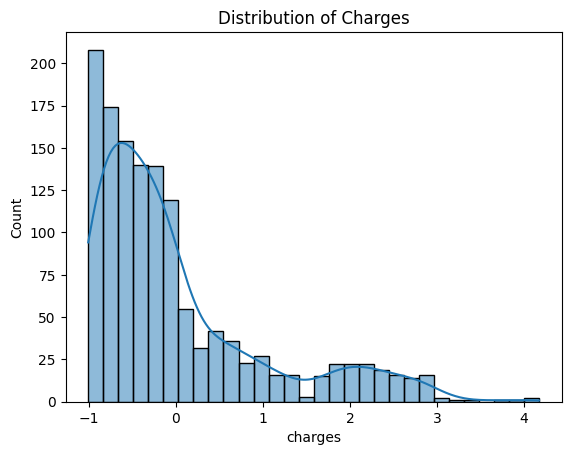

In [ ]:
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

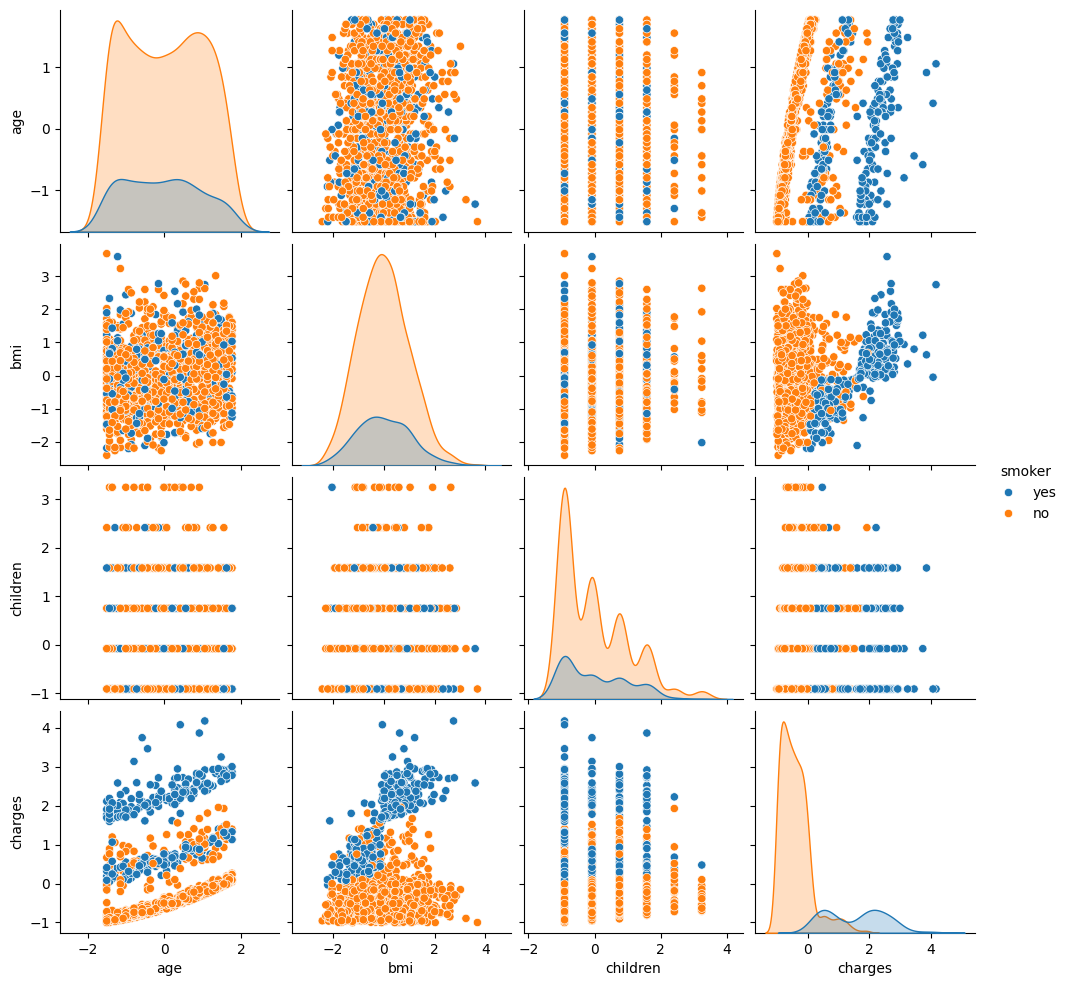

In [ ]:
sns.pairplot(df, hue='smoker')
plt.show()

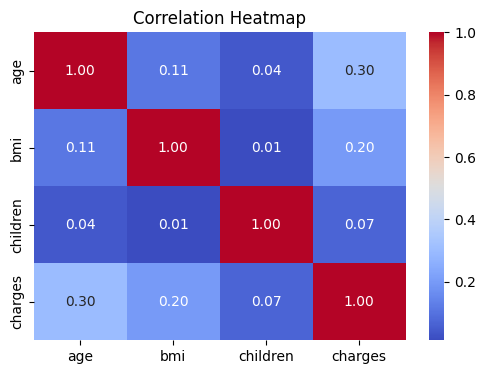

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

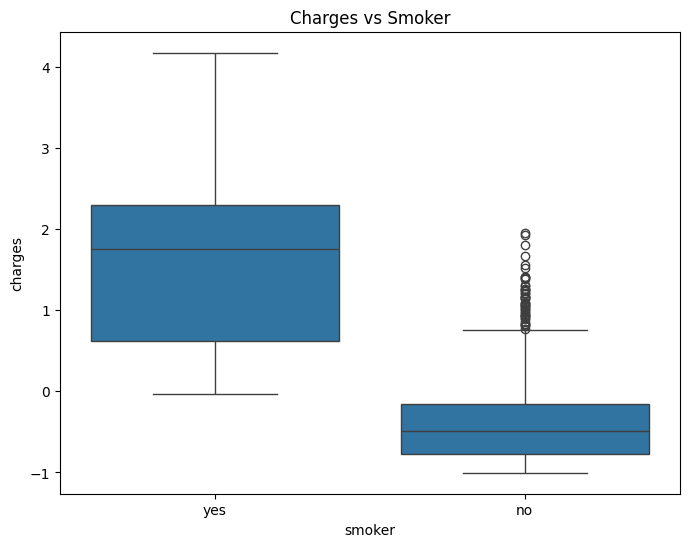

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges vs Smoker")
plt.show()

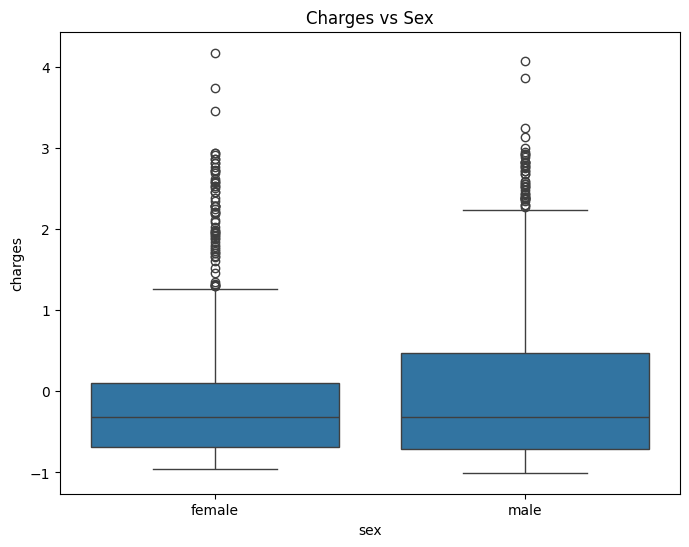

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges vs Sex")
plt.show()

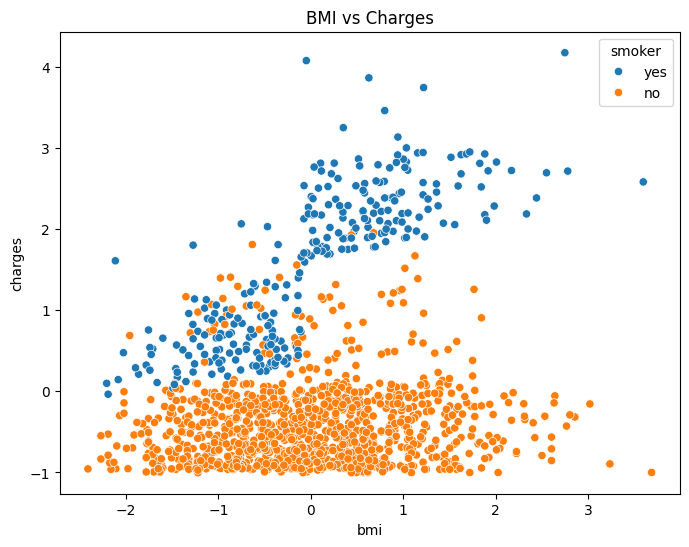

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("BMI vs Charges")
plt.show()

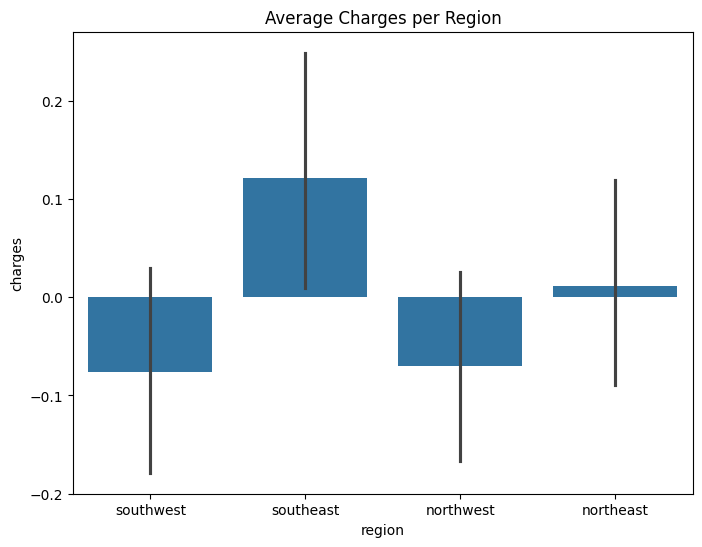

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges', data=df, estimator=np.mean)
plt.title("Average Charges per Region")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=["charges"])
y = df_encoded["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 8), (393, 8), (916,), (393,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
coefficients = dict(zip(X.columns, model.coef_))
intercept, coefficients

(-0.37295320852838293,
 {'age': 0.2907958303752942,
  'bmi': 0.15289953538093265,
  'children': 0.06182592093545759,
  'sex_male': -0.01995695446961398,
  'smoker_yes': 1.9424918124070012,
  'region_northwest': -0.002942771574638959,
  'region_southeast': -0.032231911003126786,
  'region_southwest': -0.07380880233281756})

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.2607912659470481, 0.7430861275574664)

# Mean Squared Error (MSE)

What it is: MSE measures the average squared difference between the actual values (y_test in your code) and the values predicted by your model (y_pred). It essentially quantifies the overall error of your model's predictions.
How it's calculated:
For each data point, find the difference between the actual and predicted values.
Square this difference.
Average the squared differences across all data points.
Interpretation: A lower MSE is better. It indicates that your model's predictions are closer to the actual values. An MSE of 0 means your model makes perfect predictions (which is rarely achievable in real-world scenarios).

# R-squared,
also known as the coefficient of determination, represents the proportion of variance in the dependent variable (the variable you're trying to predict - 'charges' in your case) that is explained by the independent variables (the features used for prediction).
Interpretation:
R-squared values range from 0 to 1.
A higher R-squared is better.
An R-squared of 1 means your model perfectly explains all the variance in the dependent variable.
An R-squared of 0 means your model doesn't explain any of the variance.

In [ ]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, opacity=0.6,
                 labels={"x": "Actual Charges", "y": "Predicted Charges"},
                 title="Actual vs. Predicted Insurance Charges")
fig.add_shape(
    type="line",
    x0=y_test.min(),
    y0=y_test.min(),
    x1=y_test.max(),
    y1=y_test.max(),
    line=dict(color="red", width=2, dash="dash")
)

fig.show()


In [ ]:
df_enc_noch = df_encoded.drop(columns=["children"],axis=1)

In [ ]:
df_enc_noch

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0.298584,False,True,False,False,True
1,-1.509965,0.509621,-0.953689,True,False,False,True,False
2,-0.797954,0.383307,-0.728675,True,False,False,True,False
3,-0.441948,-1.305531,0.719843,True,False,True,False,False
4,-0.513149,-0.292556,-0.776802,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,-0.220551,True,False,True,False,False
1334,-1.509965,0.206139,-0.914002,False,False,False,False,False
1335,-1.509965,1.014878,-0.961596,False,False,False,True,False
1336,-1.296362,-0.797813,-0.930362,False,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
X = df_enc_noch.drop(columns=["charges"])
y = df_enc_noch["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 7), (393, 7), (916,), (393,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
coefficients = dict(zip(X.columns, model.coef_))
intercept, coefficients

(-0.3752612708740676,
 {'age': 0.29572099849028954,
  'bmi': 0.15548356721086004,
  'sex_male': -0.018672165558120672,
  'smoker_yes': 1.9433085042102851,
  'region_northwest': -0.0008735863696467194,
  'region_southeast': -0.03641881793407724,
  'region_southwest': -0.07505371976986197})

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.2618343207286668, 0.742058580710212)

In [ ]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, opacity=0.6,
                 labels={"x": "Actual Charges", "y": "Predicted Charges"},
                 title="Actual vs. Predicted Insurance Charges")
fig.add_shape(
    type="line",
    x0=y_test.min(),
    y0=y_test.min(),
    x1=y_test.max(),
    y1=y_test.max(),
    line=dict(color="red", width=2, dash="dash")
)

fig.show()


As the age is not corelated, So droping the age and then training the model

# pickle file
Persistence: After you've spent time training your model, you don't want to repeat the process every time you need to use it. Pickling allows you to save the trained model to a file, so you can load it later and make predictions without retraining.
Sharing: You can easily share your trained model with others by giving them the pickle file. They can then load it into their own Python environments.

In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler  # Or MinMaxScaler, depending on what you used

# Load the saved model
with open('trained_model1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load the saved scaler (if it was saved separately)
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Example new data (make sure it has the same features as training data)
new_data = pd.DataFrame({
    'age': [18],
    'bmi': [15],
    'sex_male': [1],
    'smoker_yes': [0],
    'region_northwest': [1],
    'region_southeast': [0],
    'region_southwest': [0]
})

# Make predictions (this will be in scaled form)
scaled_predictions = loaded_model.predict(new_data)

# Create a temporary array with the same number of features as the scaler was trained on
num_features = scaler.scale_.shape[0]  # Get the number of features scaler was trained on

# Create a zero array for missing features
temp_array = np.zeros((new_data.shape[0], num_features))

# Assign only the last column (assuming 'charges' was the last column)
temp_array[:, -1] = scaled_predictions  # Replace last column with predicted values

# Apply inverse transform and extract the 'charges' column
original_charges = scaler.inverse_transform(temp_array)[:, -1]

# Store the results in a DataFrame
scaled_predictions_df = new_data.copy()  # Keep the original new_data
scaled_predictions_df['charges'] = original_charges  # Replace scaled 'charges' with original values

# Display the final DataFrame
print(scaled_predictions_df)


   age  bmi  sex_male  smoker_yes  region_northwest  region_southeast  \
0   18   15         1           0                 1                 0   

   region_southwest   charges  
0                 0  7.260424  


In [ ]:
import pickle

# Assuming 'model' is your trained linear regression model
# and you want to save it to a file named 'trained_model.pkl'

filename = 'trained_model1.pkl'
pickle.dump(model, open(filename, 'wb'))

# To load the model later:
# loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
import pickle

with open('insurance_model1.pkl', 'wb') as file:
    pickle.dump(model, file)

from google.colab import files
files.download('insurance_model1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
import pandas as pd

# Load the saved model
with open('insurance_model1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Example usage: Assuming you have new data in a DataFrame called 'new_data'
# Make sure the new data has the same columns and preprocessing as the training data

# Example new data (replace with your actual data)
new_data = pd.DataFrame({
    'age': [18],
    'bmi': [16],
    'sex_male': [1],
    'smoker_yes': [0],
    'region_northwest': [1],
    'region_southeast': [0],
    'region_southwest': [0]
})

# Make predictions
predictions = loaded_model.predict(new_data)
predictions


array([7.41590803])

In [ ]:
import numpy as np

# Ensure scaled_predictions_df has the same feature structure used for fitting the scaler
num_features = scaler.scale_.shape[0]  # Get number of features scaler was trained on

# Create a temporary array with the correct shape (fill with zeros for non-'charges' columns)
temp_array = np.zeros((scaled_predictions_df.shape[0], num_features))  # Matching original scaler input shape

# Replace the column that needs to be inverse transformed ('charges')
temp_array[:, -1] = scaled_predictions_df['charges'].values  # Assuming 'charges' was the last column during training

# Apply inverse transform
original_charges = scaler.inverse_transform(temp_array)[:, -1]  # Extract only the last column after transformation

# Update dataframe
scaled_predictions_df['charges'] = original_charges

# Display the dataframe
print(scaled_predictions_df)


   age  bmi  sex_male  smoker_yes  region_northwest  region_southeast  \
0   50   25         1           0                 0                 1   

   region_southwest       charges  
0                 0  4.153032e+17  
